# Статистика, прикладной поток
## Практическое задание 2

В данном задании вы визуализируйте некоторые свойства оценок (несмещенность, состоятельность, асимптотическая нормальность), посмотрите на свойства оценки максимального правдоподобия, а также сравните некоторые оценки при помощи построения функций риска.

**Правила:**

* Дедлайн **13 октября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 2"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  10 баллов
* Задача 2 -  5 баллов
* Задача 3 -  5 баллов
* Задача 4 -  5 баллов
* Задача 5 -  5 баллов
* Задача 6 -  20 баллов

Все задачи имеют тип **O2**. Подробнее см. в правилах выставления оценки.

In [3]:
import numpy as np
import scipy.stats as sps
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

**Задача 1.** В этой задаче предлагается изучить *свойство несмещённости*.

_____________________
**1.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:** Несмещенными оценками является $\frac{n+1}{n}X_{(n)}$ и $2\overline{X}$, Так как  $\mathbb{E}(X_{(n)}) = \frac{n}{n+1}\theta$, $\mathbb{E}\overline{X}=\frac{\theta}{2}$

Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$:

Вычислите $k = 500$ независимых оценок $\widehat{\theta_1}, ... , \widehat{\theta_k}$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $U[0, 1]$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta_1}, $y$), ... , (\widehat{\theta_k}, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ -- произвольные различные (например 0, 1, 2) координаты для трёх различных типов оценок.

Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение трёх типов оценок и их среднее.

Копипаста неприемлема, используйте циклы и функции.

Используйте данный шаблон для визуализации значений:

In [4]:
# Для каждой оценки:
def scatter_estimator(estimators, y, color, label):
    plt.scatter(estimators , np.zeros(500) + y, 
                alpha=0.1, s=100, color=color, label=label)
    plt.scatter(estimators.mean(), y, marker='*', s=200, 
                color='w', edgecolors='black')

# Для всего графика:
def get_plot(n):
    plt.vlines(1, 0, 2, color='r')
    plt.title('sample size = %d' % n)
    plt.yticks([])
    plt.legend()

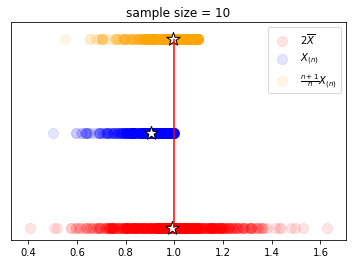

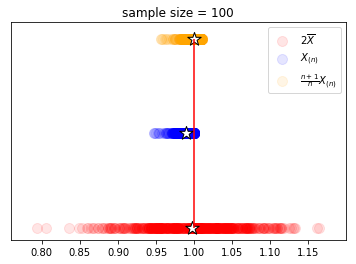

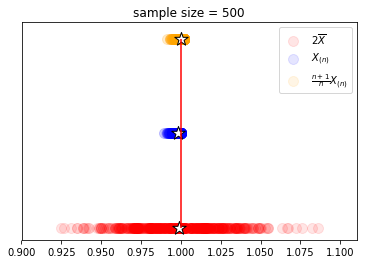

In [5]:
ns = [10, 100, 500]

for n in ns:
    sample = sps.uniform(loc=0, scale=1).rvs(size=(500, n))
    plt.figure()
    scatter_estimator(2*sample.mean(axis=1), 0, 'red', '$2\overline{X}$')
    scatter_estimator(sample.max(axis=1), 1, 'blue', '$X_{(n)}$')
    scatter_estimator((n+1)/n*sample.max(axis=1), 2, 
                                      'orange', r'$\frac{n+1}{n}X_{(n)}$')
    get_plot(n)
    plt.show()    

__________________
**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для трёх типов оценок. Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

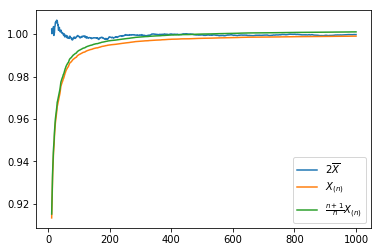

In [7]:
max_n = 1000
sample = sps.uniform(loc=0, scale=1).rvs(size=(500, max_n))
grid = np.linspace(1, max_n, max_n)

def plot(estimators, label):
    global max_n, grid
    theta_mean_sample = estimators.sum(axis=0)/500
    plt.plot(grid[10 :], theta_mean_sample[10:], label=label)



max_sample = np.maximum.accumulate(sample, axis=1)

plt.figure()

plot(2*sample.cumsum(axis=1)/grid, r'$2\overline{X}$')
plot(max_sample, r'$X_{(n)}$')
plot((n+1)/n*max_sample, r'$\frac{n+1}{n}X_{(n)}$')

plt.legend()
plt.show()


Каждая из этих оценок является асмиптотически несмещенной. Ну, это логично, так как $2\overline{X}, \frac{n+1}{n}X_{(n)}$ - уже являются несмещенными, а значит и асимптотически несмещ. в том числе. А $X_{(n)}$ - асим. несмещенная, потому что $\mathbb{E}X_{(n)} = \frac{n}{n+1}\theta \to \theta$ при $n \to + \infty$.

_______________________________________________________
**3.** Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$. Какие из этих оценок являются несмещенными?

*Напоминание:* $S^2 = \frac{1}{n} \sum\limits_{i = 1}^{n} (X_i - \overline{X})^2 = \overline{X^2} - \overline{X}^2$

**Ответ:** $\frac{n}{n-1}S^2$ - несмещенная, а $S^2$ - нет, так как $\mathbb{E}S^2 = \frac{n-1}{n}\sigma^2$

Для данной модели повторите действия из первых двух частей.

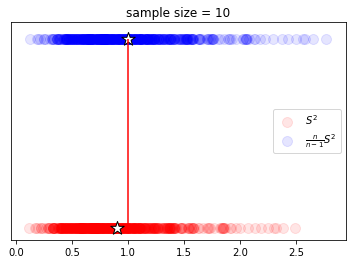

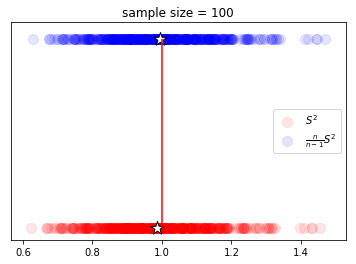

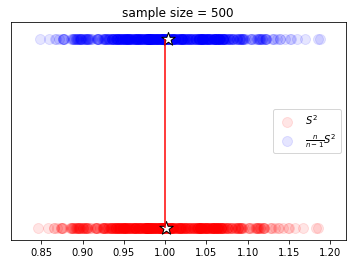

In [8]:
for n in ns:
    sample = sps.norm(loc=0, scale=1).rvs(size=(500, n))
    plt.figure()
    sample_variance = (sample**2).mean(axis=1) - (sample.mean(axis=1))**2
    scatter_estimator(sample_variance, 0, 'red', '$S^2$')
    scatter_estimator(n/(n-1)*sample_variance, 2, 'blue', r'$\frac{n}{n-1}S^2$')
    get_plot(n)
    plt.show() 

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** Если оценка обладает свойством несмещенности, это значит, что если у нас много выборок, и мы вычисляем значение оценки по выборкам, то среднее значение получается примерно равно истинному значению оценки. 

В физике множество результатов какого-то опыта можно описать равномерным распределением $\mathcal{N}(a, \sigma^2)$, где $a$ - это истинный результат эксперимента, а $\sigma$ - это среднеквадратичная ошибка. Поэтому чтобы оценить погрешность эксперимента, то есть квадрат ошибки $\sigma^2$, можно использовать $\frac{n}{n-1}S^2$, (то есть $n-1$ в знаменателе, а не $n$) тогда оценка нашей погрешности будет несмещенной.

__________________

**Задача 2.** В этой задаче нужно визуализировать *свойство состоятельности*.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U(0, \theta)$. Из домашнего задания известно, что оценки $\theta^* = 2\overline{X}, \widehat{\theta} = X_{(n)}$ являются состоятельными оценками $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них указанные выше оценки параметра $\theta$ в зависимости от размера выборки и визуализировав их состоятельность.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\theta^*_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$, $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценки параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки. При написании кода могут помочь функции `numpy.cumsum(axis=...)` и `np.maximum.accumulate(axis=...)`.

In [9]:
sample = sps.uniform(loc=0, scale=1).rvs(size=(300, 500))



sample_mean = 2*sample.cumsum(axis=1)/np.arange(1, 501)

max_sample = np.maximum.accumulate(sample, axis=1)

Для каждой оценки $\theta^*, \widehat{\theta}$ нарисуйте следующий график. Для каждого $j$ нанесите на один график зависимости $\theta^*_{jn}$ или $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

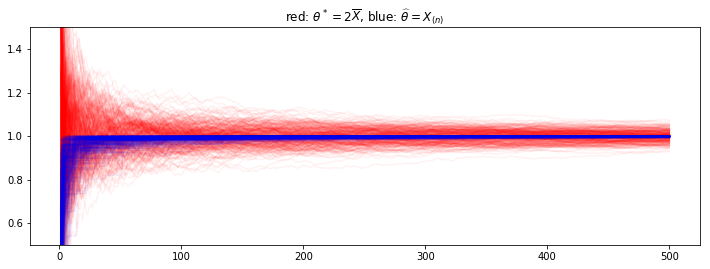

In [10]:
grid = (np.arange(500*300) % 500 + 1).reshape(300, 500)
plt.figure(figsize=(12, 4))
plt.ylim((0.5, 1.5))
plt.title(r'red: $\theta^* = 2\overline{X}$, blue: $\widehat{\theta} = X_{(n)}$')

plt.plot(grid.T, sample_mean.T, alpha=0.05, color='red')
plt.plot(grid.T, max_sample.T, alpha=0.05, color='blue')


plt.show()

Сделайте вывод о смысле состоятельности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод: ** Смысл в том, что оценка $\widehat{\theta}$ параметра $\tau(\theta)$ при $n \to +\infty$ будет стремится к самому параметру $\tau(\theta)$. Судя по графикам, проделанные эксперименты подверждают эти свойства, так они стремятся к $\theta$ при $n \to +\infty$

__________________
**Задача 3.** В этой задаче нужно визуализировать *свойство асимптотической нормальности*.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U(0, 1)$. Согласно центральной предельной теореме оценка $\theta^* = 2\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$.  Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n = \sqrt{n} \left( 2\overline{X} - \theta \right)$ в зависимости от размера набора. 

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br> 
По каждой из них посчитайте оценки  $\theta^*_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $Z_{jn} = \sqrt{n} \left( \theta^*_{jn} - \theta \right)$, где $\theta = 1$.

In [24]:
sample = sps.uniform(loc=0, scale=1).rvs(size=(300, 500))
grid = np.arange(1, 501)

sample_mean = 2*sample.cumsum(axis=1)/grid

z = (grid**0.5)*(sample_mean - 1)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

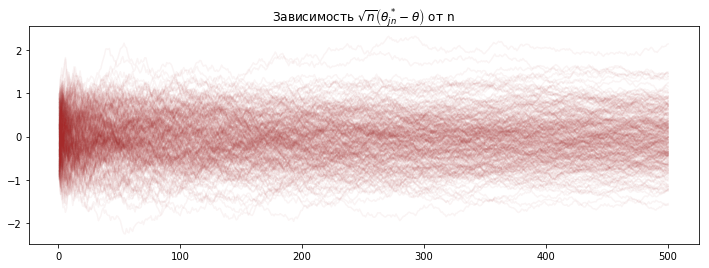

In [21]:
plt.figure(figsize=(12, 4))

plt.title(r'Зависимость $\sqrt{n} \left( \theta^*_{jn} - \theta \right)$ от n')

x = np.arange(500*300) % 500 + 1

plt.plot(x.reshape(300, 500).T, z.T, alpha=0.05, color='brown')

plt.show()    

Нет, не стремится ни к какой константе

Для $n=500$ по выборке $Z_{1,500}, ..., Z_{300,500}$ постройте гистограмму и график плотности распределения $\mathcal{N}(0, 1)$.  Не забудьте сделать легенду.

/home/ilya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


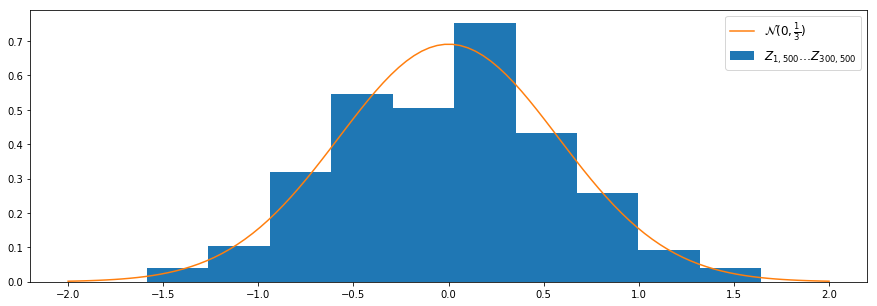

In [45]:
plt.figure(figsize=(15, 5))


plt.hist(z[:,-1], bins=10, normed=True, label=r'$Z_{1,500} \dots Z_{300,500}$')
plt.plot(np.linspace(-2, 2, 100), 
             sps.norm(loc=0,scale=(1/3)**(0.5)).pdf(np.linspace(-2, 2, 100)),
                                        label=r'$\mathcal{N}(0, \frac{1}{3})$')
plt.legend(fontsize=12)

plt.show()

Сделайте вывод о смысле свойства асимптотической нормальности. Подтверждают ли сделанные эксперименты теоретические свойства?

Смысл асимптотической нормальности в том, что асимп. норм. оценка параметра $\tau(\theta)$ при $n \to +\infty$ стремится к этому параметру $\tau(\theta)$, причем с разбросом, стремящимся к нулю, а именно равным $\frac{\sigma^2}{n}$. Эксперименты подтверждают эти свойства, так $\sqrt{n} \left( \theta^*_{jn} - \theta \right)$ с ростом ведет себя как нормальное распределение $\mathcal{N}(0, \sigma^2 = \frac{1}{3})$

__________________
**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$.  Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них оценку $X_{(n)}$ параметра $\theta$ в зависимости от размера выборки и визуализировав рассматриваемое свойство.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $T_{jn} = n \left( \theta - \widehat{\theta}_{jn} \right)$, где $\theta = 1$.

In [39]:
sample = sps.uniform(loc=0, scale=1).rvs(size=(300, 500))

max_sample = np.maximum.accumulate(sample, axis=1)

t = np.arange(1, 501)*(1 - max_sample)

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Все кривые должны быть нарисованы *одним и тем же цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

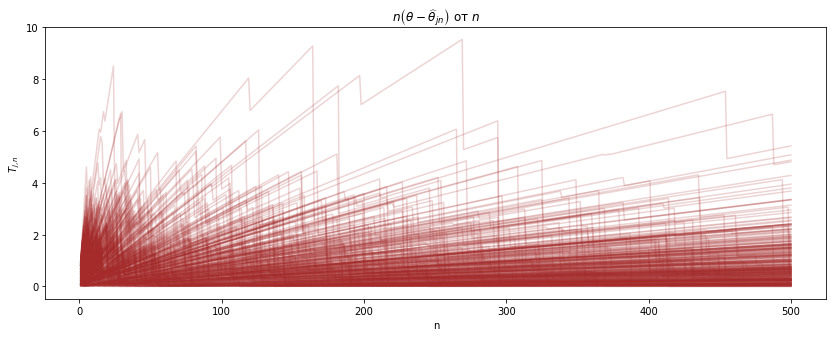

In [43]:
plt.figure(figsize=(14, 5))

plt.title(r'$n \left( \theta - \widehat{\theta}_{jn} \right)$ от $n$')
plt.xlabel('n')
plt.ylabel('$T_{j,n}$')

x = np.arange(500*300) % 500 + 1

plt.plot(x.reshape(300, 500).T, t.T, alpha=0.2, color='brown')

plt.show()    

**Ответ:** Да, сходятся к нулю

Для $n=500$ по выборке $T_{1,500}, ..., T_{300,500}$ постройте гистограмму и график плотности распределения $Exp(1)$.  Не забудьте сделать легенду.

/home/ilya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


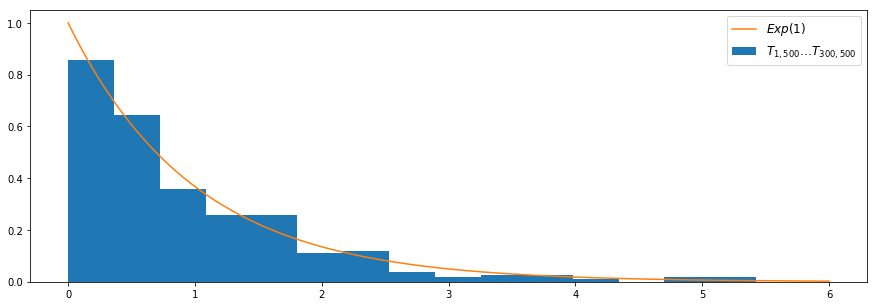

In [55]:

plt.figure(figsize=(15,5))


plt.hist(t[:, 499], normed=True, bins=15, label=r'$T_{1,500} \dots T_{300,500}$')
plt.plot(np.linspace(0, 6, 100), 
                 sps.expon(loc=0, scale=1).pdf(np.linspace(0, 6, 100)),
                                            label=r'$Exp(1)$')

plt.legend(fontsize=12)
plt.show()

Хорошо ли гистограмма приближает плотность распределения $Exp(1)$? Подтверждают ли проведенные эксперименты свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$? Что можно сказать в сравнении с оценкой, рассмотренной в предыдущей задаче?

**Вывод: ** Приближает плотность $Exp(1)$ довольно хорошо, но с погрешностями, видимо из-за небольших значений $n$, эксперименты подтверждают сходимость по распределению. Такое свойство оценки $X_{(n)}$ параметра $\theta$ похоже на свойство асимптотической нормальности, тем что оно также  при $n \to +\infty$ стремится к некоторому числу, завис. от $\theta$, а также разброс оценки от $\theta$ стремиться к нулю с ростом $n$

__________________
**Задача 5.** Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [56]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    """
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

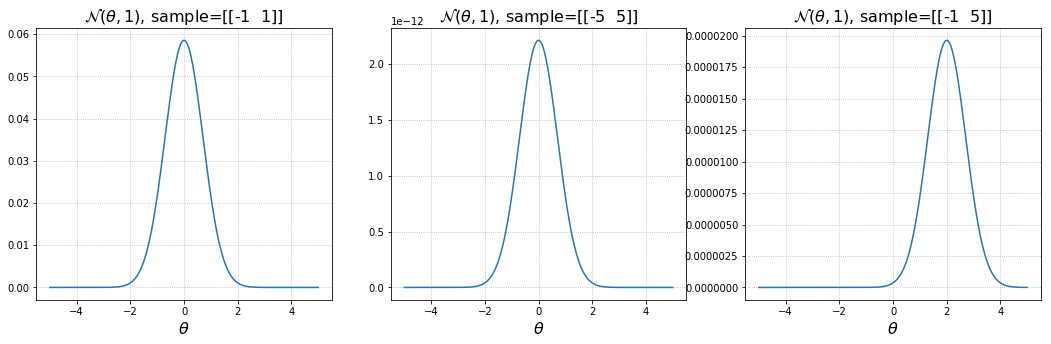

In [57]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
 [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')


Выполните остальные:

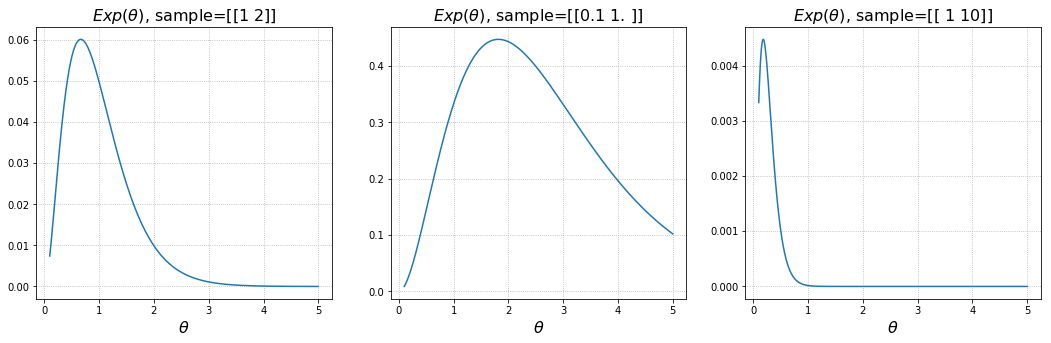

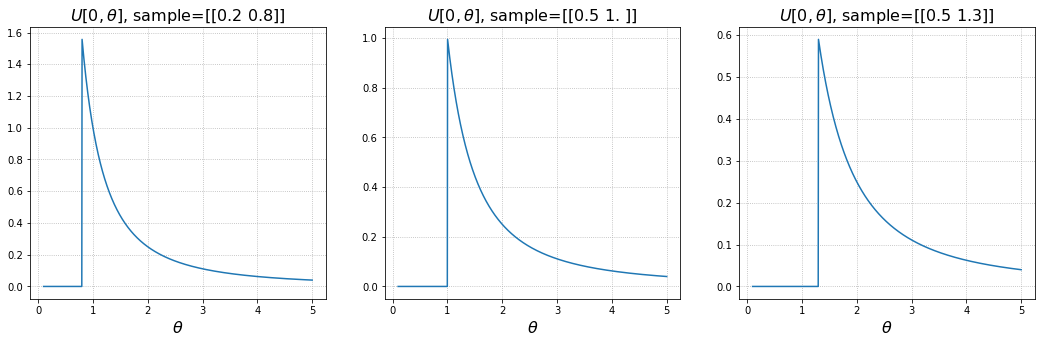

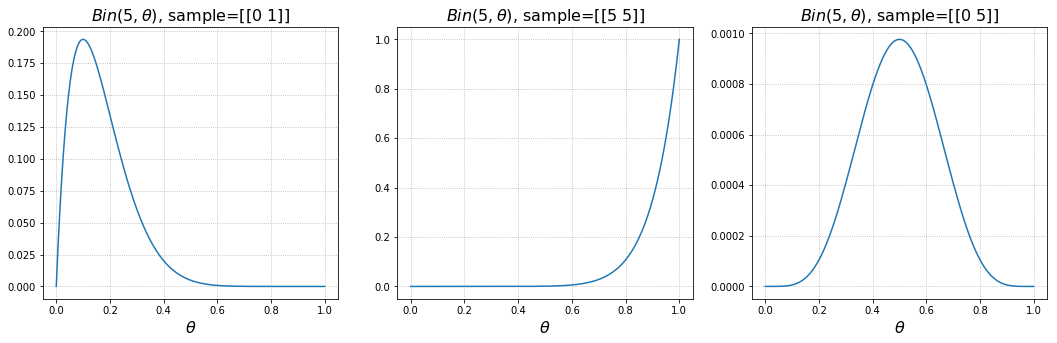

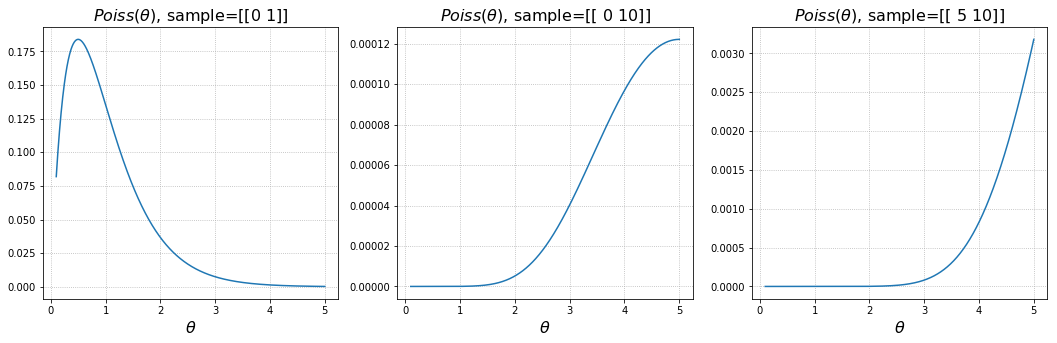

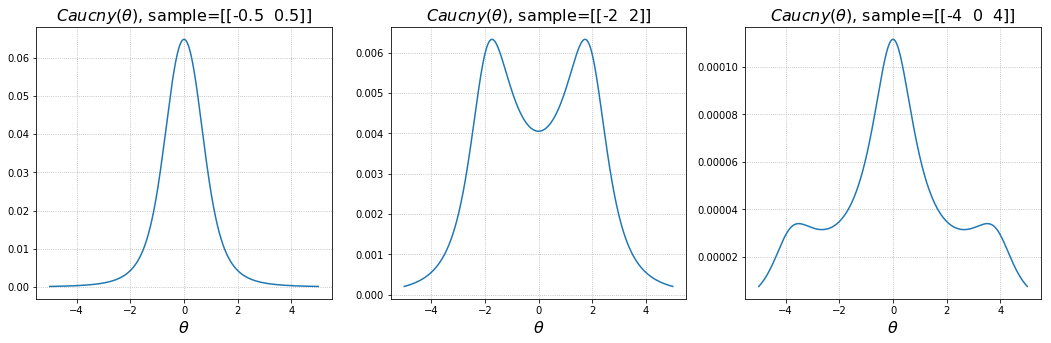

In [59]:
grid = np.linspace(0.1, 5, 1000).reshape((-1, 1))


draw_likelihood(sps.expon(scale=1/grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')
draw_likelihood(sps.uniform(loc = np.zeros(1000).reshape((-1,1)), scale=grid).pdf, 
                grid, [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], r'$U[0, \theta]$')

grid = np.linspace(0, 1, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, 
                 [[0, 1], [5, 5], [0, 5]], r'$Bin(5, \theta)$')


grid = np.linspace(0.1, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                 [[0, 1], [0, 10], [5, 10]], r'$Poiss(\theta)$')


grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                 [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], r'$Caucny(\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**

Известно, что функция правдоподобия, зависящая от $\theta$ есть произведение значений плотностей для каждого элемента из выборки. То есть это функция от $\theta$, при фиксированной выборке. То есть плотностью функция правдоподобия не является.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [60]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы: **

Ответ: Потому что произведение большого количества маленьких чисел(меньше 1) выраждается в ноль в питоне.
Решение: берем логарифм плотности и суммируем результат. Получаем логарифм функции правдоподобия и она уже не выраждается в ноль.

In [191]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-141957.6264490397


__________________
**Задача 6.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

In [84]:

def Plot(theta, Risk, estimators, labels, max_ylim):
    for label, estimator in zip(labels, estimators):
        plt.plot(theta, Risk(estimator, theta),
             label=label)  # для каждой оценки
    plt.grid(ls=':')
    plt.xlabel('$\\theta$', fontsize=16)
    plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
    plt.legend(fontsize=14)
    plt.title(Risk.__name__, fontsize=16)
    plt.ylim((0, max_ylim))

**Решение:**

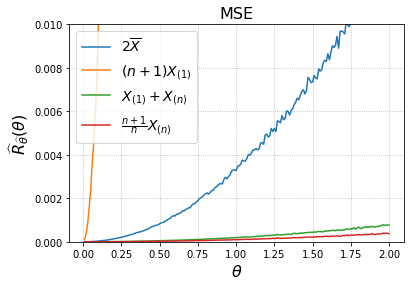

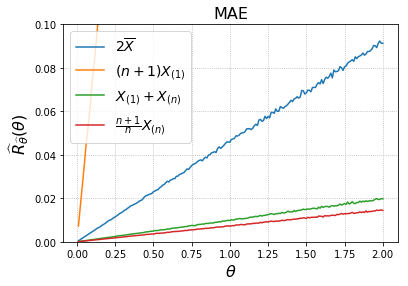

In [85]:
theta = np.arange(0, 2, 0.01) + 0.01
n = 100
k = 5000

vectorized_rvs = np.vectorize(lambda scale, size: 
                             sps.uniform(loc=0, scale=scale).rvs(size=size), 
                                                 signature='(),(y)->(n,m)')
sample = vectorized_rvs(scale=theta, size=(k,n))

sample_mean = 2*sample.mean(axis=2)
min_sample = (n+1)*sample.min(axis=2)
max_sample = (n+1)/n*sample.max(axis=2)
sum_sample = sample.min(axis=2) + sample.max(axis=2)


def MSE(estimator, theta):
    return ((estimator - theta.reshape((-1, 1)))**2).mean(axis=1)

def MAE(estimator, theta):
    return (np.abs(estimator - theta.reshape((-1, 1))) ).mean(axis=1)

labels=[r'$2\overline{X}$', r'$(n+1)X_{(1)}$', r'$X_{(1)} + X_{(n)}$',
                                            r'$\frac{n+1}{n}X_{(n)}$']
estimators = [sample_mean, min_sample, sum_sample, max_sample]

plt.figure()
Plot(theta, MSE, estimators, labels, 0.01)
plt.show()

plt.figure()
Plot(theta, MAE, estimators, labels, 0.1)
plt.show()

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** Судя по графикам, лучше получается оценка $\frac{n+1}{n}X_{(n)}$, причем как в среднеквадратичном подходе, так и при линейной функции потерь.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Рассмотрим оценки $\left(k! \middle/ \overline{X^k} \right)^{1 / k}$ для $1 \leqslant k \leqslant 5$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не дублировать код. Функция факториала реализована как  `scipy.special.factorial`.

**Решение:**

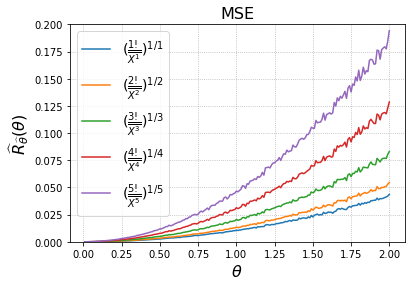

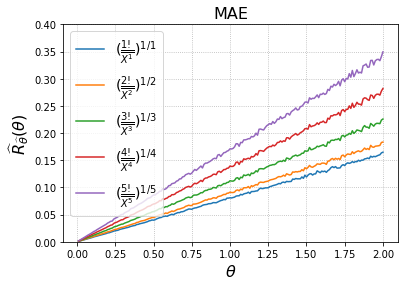

In [95]:
from scipy.special import factorial as fact

vectorized_exp_rvs = np.vectorize(lambda scale, size: 
                                  sps.expon(scale=1/scale).rvs(size=size), 
                                                     signature='(),(y)->(n,m)')

sample = vectorized_exp_rvs(scale=theta, size=(5000,100))

likelihood_estimators = [(fact(k)/((sample ** k).mean(axis=2)))**(1/k) 
                                                     for k in range(1, 6)]

labels = [r'$(\frac{%d!}{\overline{X^%d}})^{1/%d}$' % (k, k, k)  
                                                      for k in range(1, 6)]


plt.figure()
Plot(theta, MSE, likelihood_estimators, labels, 0.2)
plt.show()

plt.figure()
Plot(theta, MAE, likelihood_estimators, labels, 0.4)
plt.show()

**Вывод:** Выходит, что при равномерном подходе лучше всего получается при $k = 1$, причем при как при квадратичной функции потерь, так и при линейной.